#Acceso a la carpeta de Drive

In [44]:
from google.colab import drive;
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Instalaciones

In [45]:
!pip install -q pycountry
!pip install -q --upgrade pymc3

import pycountry

In [46]:
!pip install -q condacolab
import condacolab

In [47]:
!pip install --upgrade geopandas

#Importaciones

In [48]:
import pandas        as pd
import seaborn       as sns
import numpy         as np
import pandas        as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas

from scipy import stats
from pandas import DataFrame
from sklearn import preprocessing

#Funciones

In [49]:
def PorcentajeNulos(datos):
  total = datos.isnull().sum().sort_values(ascending=False)
  percent = (datos.isnull().sum()/datos.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
  
  return  missing_data.head(42)

#Cargar CSV

##Ratio de suicio de 1985 a 2016

In [50]:
sr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/master.csv")

##Casos de Depresión Registrados

In [51]:
dr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/DepresionPais_2022.csv")

##Países con mayor consumo de antidepresivos

In [52]:
ar = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/ConsumoAntidepresivos.csv")

##Índice de Democracia

In [53]:
dir = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/IndiceDemocracia.csv")

##Racismo por país

In [54]:
rr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/paisesMasPeligrosos_Racismo.csv")

##Machismo por país

In [55]:
mr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/paisesMasPeligrosos_Mujer.csv")

##Tasa de Desempleo

In [56]:
ur = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/AccesoSanidad.csv")

##Índice de países con acceso a Asistencia Sanitaria Universal

In [57]:
uhr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/tasaDesempleo.csv")

##Ranking de Sistemas Educativos

In [58]:
esr = pd.read_csv("/content/drive/MyDrive/BIDA/EDA/SuicideRates/CSV/Educacion.csv")

##Descartado por falta de información



1.   Acceso a vivienda
2.   Enfermedades más comúnes por país
3.   Casos de bulling
4.   Abusos laborales



#Informe

##Comprobar el dataframe de suicide_rate

In [59]:
sr_original = sr.copy()

In [60]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [61]:
sr.describe()

,year,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,698.171765,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,247.902248,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.630000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,673.000000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,765.000000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,844.000000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,944.000000,126352.000000


In [62]:
PorcentajeNulos(sr)

,Total,Percent
HDI_for_year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year,0,0.000000


Al tener una cantidad de valores nulos tan elevada, se elimina la columna

In [63]:
sr = sr.drop(columns=['HDI_for_year'])

###Adaptar dataframe para la carga del mapamundi

In [64]:
df1 = sr.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [65]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [66]:
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

In [67]:
sr.replace("Republic of Korea", "Korea, Republic of", inplace = True)
sr.replace('Czech Republic', "Czechia", inplace = True)
sr.replace('Macau', 'Macao', inplace = True)
sr.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

###Mostrar dataframe

In [68]:
display(sr)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


##Mapamundi con los casos de suicidio

###*Preparación*

####Casos Totales por Pais y Año

In [69]:
df_suino = sr.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = sr.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

####Crear un diccionario con el país como valor y la media de suicidios como valor

In [70]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]
country_dict

{'Albania': 0.003136984684061103,
 'Antigua and Barbuda': 0.0005409489166823567,
 'Argentina': 0.007910779667076647,
 'Armenia': 0.0024749247686200898,
 'Aruba': 0.008096933493560535,
 'Australia': 0.01301252780600865,
 'Austria': 0.0207091207880936,
 'Azerbaijan': 0.0014855603646231302,
 'Bahamas': 0.0014056013235763589,
 'Bahrain': 0.002896571150198362,
 'Barbados': 0.0029418299240033708,
 'Belarus': 0.03023114944411501,
 'Belgium': 0.020746702962906,
 'Belize': 0.005164501655320305,
 'Bosnia and Herzegovina': 0.004350837948841556,
 'Brazil': 0.0045708851987239,
 'Bulgaria': 0.015541167214000517,
 'Cabo Verde': 0.009288357044444789,
 'Canada': 0.013131092098061944,
 'Chile': 0.009248952222949377,
 'Colombia': 0.00467417233412583,
 'Costa Rica': 0.006519237734852839,
 'Croatia': 0.020064417886258883,
 'Cuba': 0.016537065143099633,
 'Cyprus': 0.003557848000759014,
 'Czechia': 0.016548479616674112,
 'Denmark': 0.01370260598319472,
 'Dominica': 0.0,
 'Ecuador': 0.005891242317648045,
 'El

In [71]:
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[countries[country_list[idx]]] = country_suicide[idx]

####Asociar país con su código iso_a3

In [72]:
new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

,iso_a3,suicide_rate
0,LTU,0.040736
1,RUS,0.032703
2,LKA,0.030848
3,BLR,0.030231
4,HUN,0.029617


In [73]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [74]:
result = pd.merge(world, new_country_df, on = "iso_a3")
result.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,suicide_rate
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.003708
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.013131
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.012835
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.027041
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",0.007232


###Mapa y gráfica

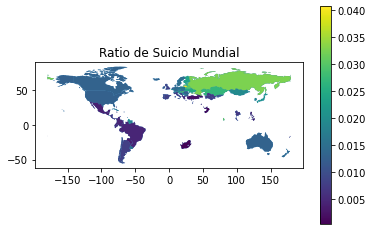

In [75]:
ax = result.plot()
ax.set_title("Ratio de Suicio Mundial")
result.plot(column='suicide_rate', ax = ax, legend=True)

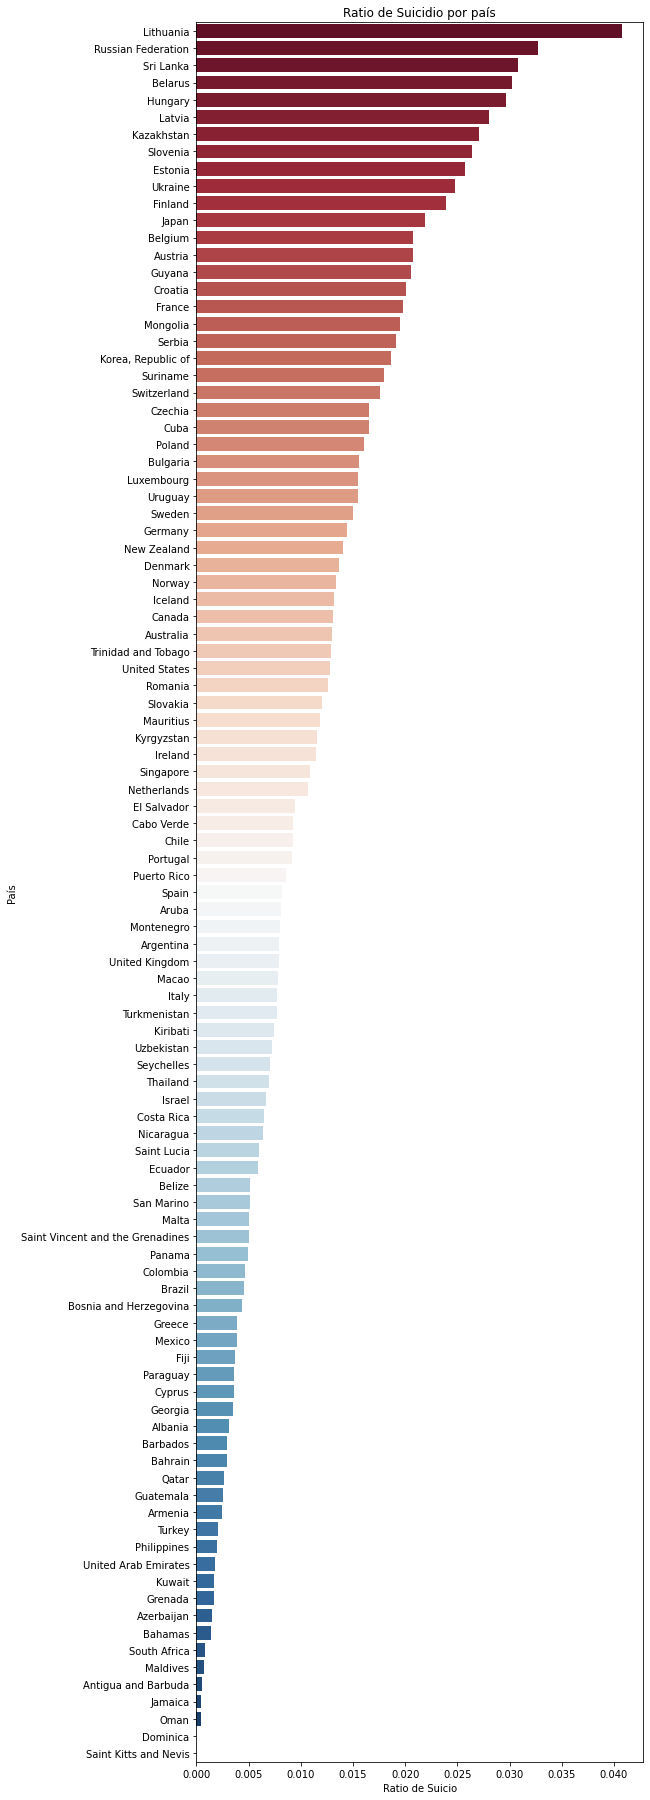

In [76]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="RdBu")
plt.xlabel("Ratio de Suicio")
plt.ylabel("País")
plt.title("Ratio de Suicidio por país")
plt.show()

###Suicidio por rango de edades

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


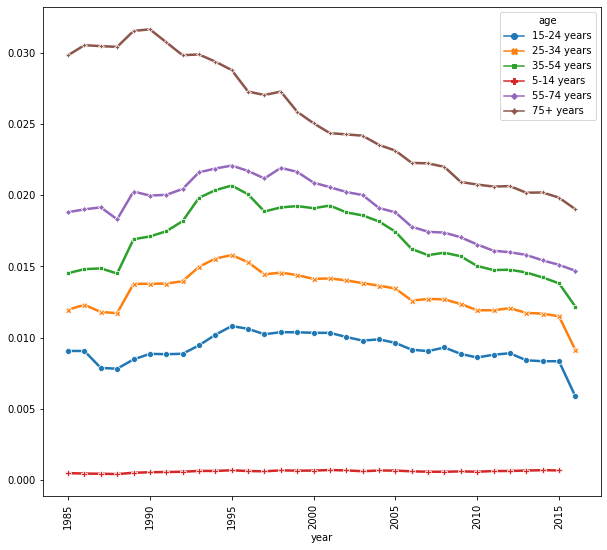

In [77]:
df_age = sr.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(10,9))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

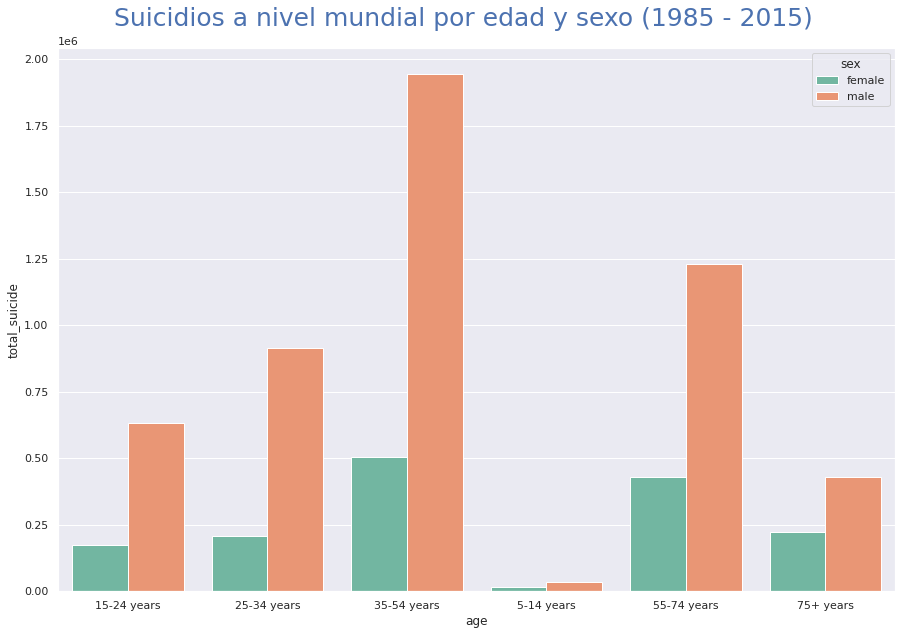

In [78]:
data_sc_no = sr.groupby(by=['age', 'sex']).agg({'suicides_no': ['sum']})
data_sc_no.columns = ['total_suicide']
data_sc_no.reset_index(inplace=True)

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='age', y='total_suicide', hue='sex', data=data_sc_no, palette=color)


plt.figtext(.5,.91,'Suicidios a nivel mundial por edad y sexo (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.show()

###Suicidios por género

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


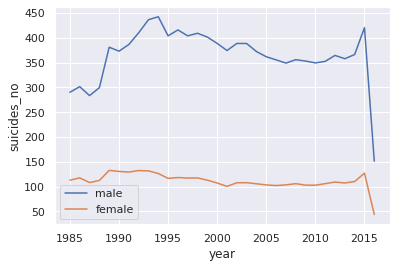

In [79]:
df_men = sr[sr.sex == "male"]
df_women = sr[sr.sex == "female"]
sns.lineplot(df_men.year, sr.suicides_no, ci = None)
sns.lineplot(df_women.year, sr.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

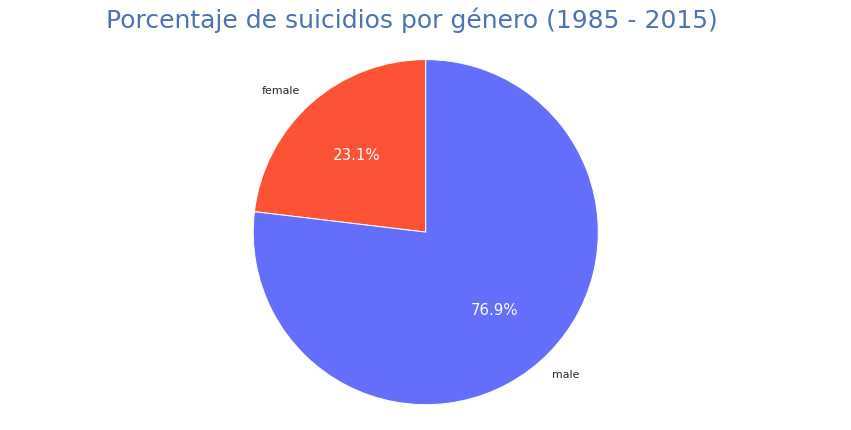

In [80]:
data_grp_mf = sr.groupby(by=['sex']).agg({"suicides_no": ['sum']})
data_grp_mf.columns = ['total_suicide']
data_grp_mf.reset_index(inplace=True)

fig1, ax1 = plt.subplots(figsize=(15, 7))
wedges, texts, autotexts = ax1.pie(data_grp_mf['total_suicide'], labels=data_grp_mf['sex'], autopct='%1.1f%%', startangle=90, colors=['#fd5235', '#636efa'])
ax1.axis('equal')

plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'Porcentaje de suicidios por género (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.show()

In [81]:
sr.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

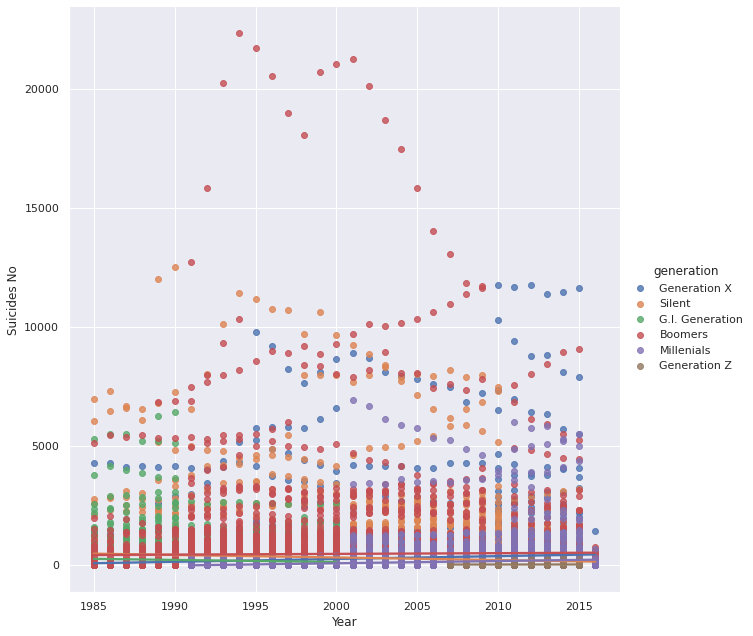

In [82]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation",
               truncate=True, height=9, data=sr)

g.set_axis_labels("Year", "Suicides No")
plt.show()



*   Generación X             : **1959-1983**
*   Generación Silenciosa    : **1928-1945**
*   Generación Gradiosa (G.I): **1901-1927**
*   Generación Boomer        : **1946-1964**     
*   Generación Y (Millenials): **1980-2000**
*   Generación Z             : **2001-2010**



###Matriz de correlación

Tal como está orientado este dataframe, se situa que la principal causa causa de suicio puede estar entre la riqueza económica personal o del país. 

In [83]:
corr_matrix = sr.corr()

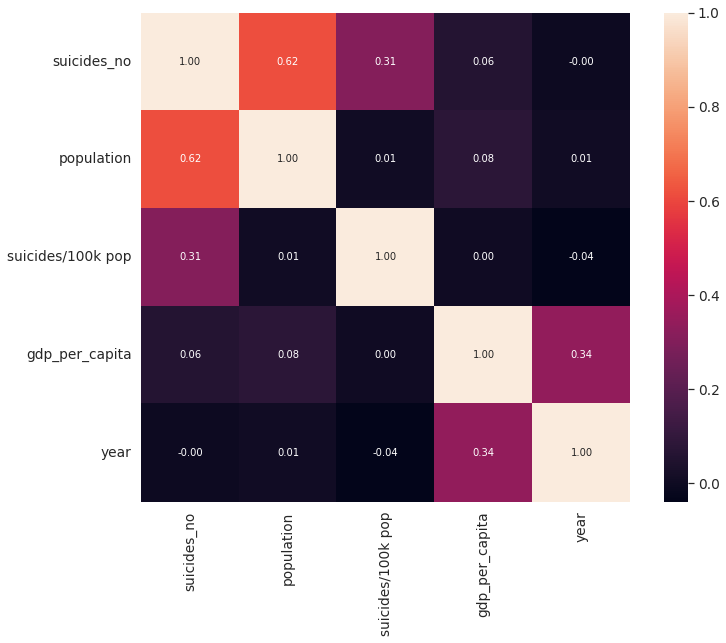

In [84]:
k = 50

cols = corr_matrix.nlargest(k, 'suicides_no')['suicides_no'].index
cm = np.corrcoef(sr[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize = (12,9))
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square = True, fmt = '.2f',
                 annot_kws = {'size':10},
                 yticklabels=cols.values,
                 xticklabels=cols.values
                 )

plt.show()

###Relación entre el Producto Interior Bruto (PIB) aka gdp_per_capita 

####Obtener un listado con los países con menor gdp_per_capita

In [85]:
sr['gdp_per_capita'].median()

9372.0

####Paises por debajo de la media del gdp

In [86]:
under_gdp = sr.loc[(sr['gdp_per_capita'] <= sr['gdp_per_capita'].median())]

In [87]:
under_gdp['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Cabo Verde', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Czechia', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji',
       'Georgia', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Kazakhstan', 'Kiribati',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'New Zealand',
       'Nicaragua', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Korea, Republic of', 'Romania',
       'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Serbia', 'Seychelles',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sri Lanka',
       'Suriname', 'Thailand', 

In [88]:
list_under_gdp =  ['Maldives','Suriname','Mauritius','Brazil','Belize','Malta','Saint Lucia','Montenegro','Albania','Kyrgyzstan']

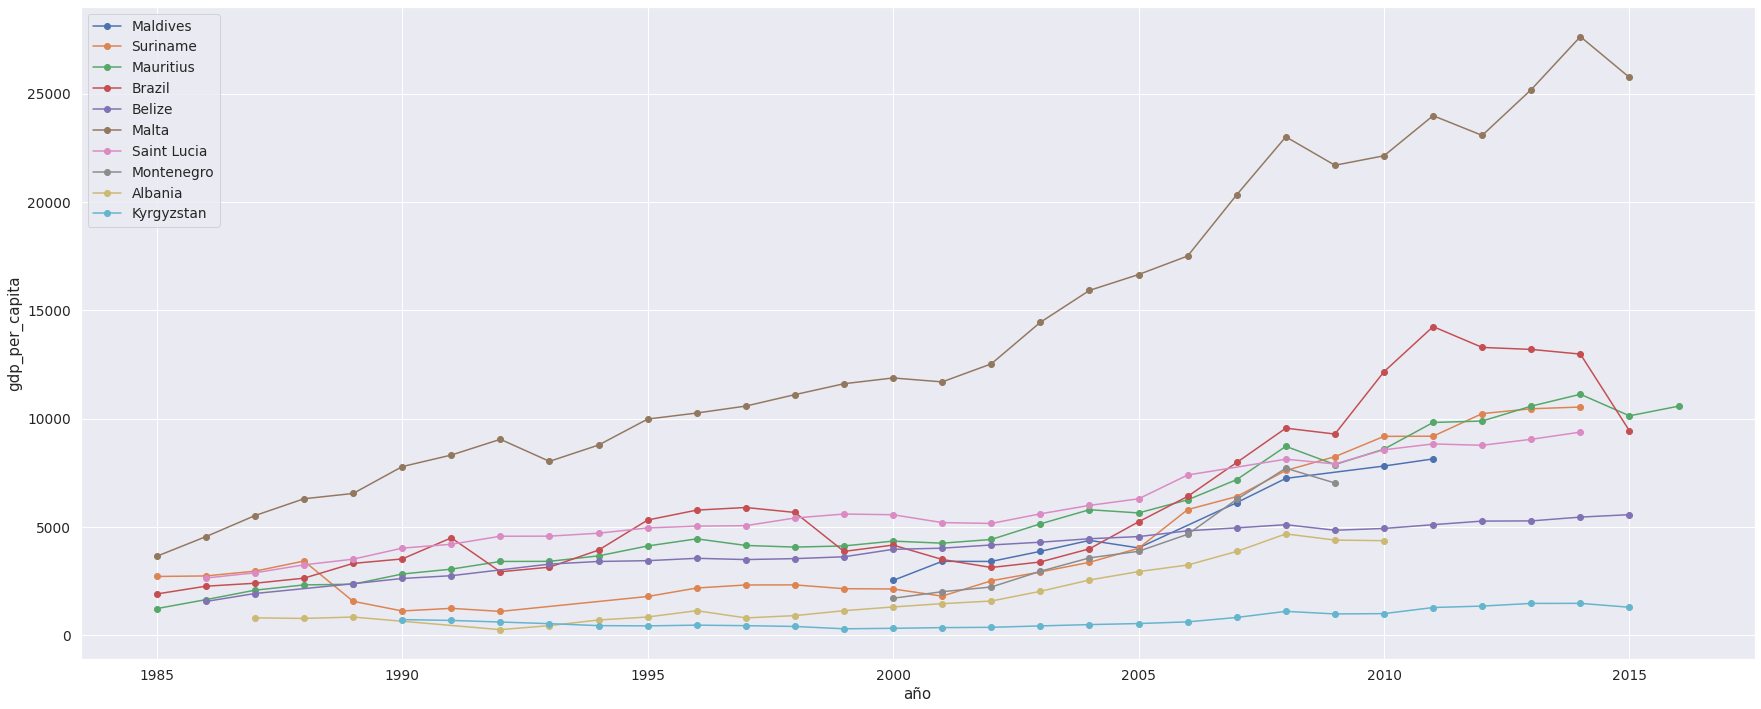

In [89]:
plt.figure(figsize = (30,12))
df_gdp = sr.groupby(["country","year"]).gdp_per_capita.mean()
for country in list_under_gdp:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

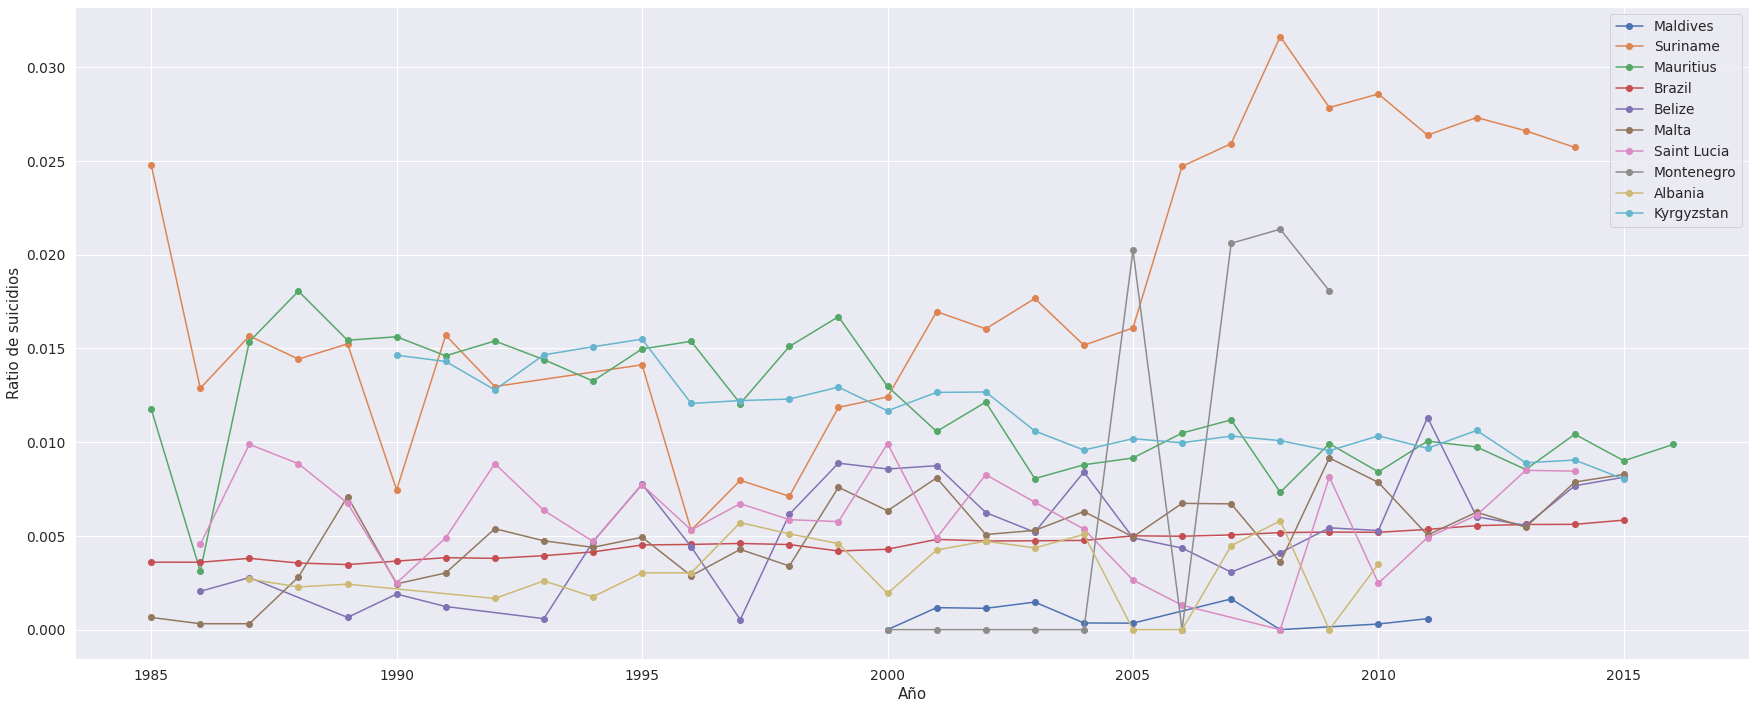

In [90]:
plt.figure(figsize = (30,12))
for country in list_under_gdp:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("Año")
plt.ylabel("Ratio de suicidios")
plt.legend()
plt.show()

Cogiendo de ejemplo a Kyrgyzstan, vemos que esa premisa se cumple, pues cuánta menor gdp_per_capita, mayor es el número de suicidios, al aumentar el valor, el número comienza a descender

¿Pero que pasa con los países ricos?

In [91]:
up_gdp = sr.loc[(sr['gdp_per_capita'] > sr['gdp_per_capita'].median())]

In [92]:
list_up_gdp = ['Luxembourg','Norway','Qatar','Switzerland','Singapore','Iceland','San Marino','Australia','United States','Denmark']

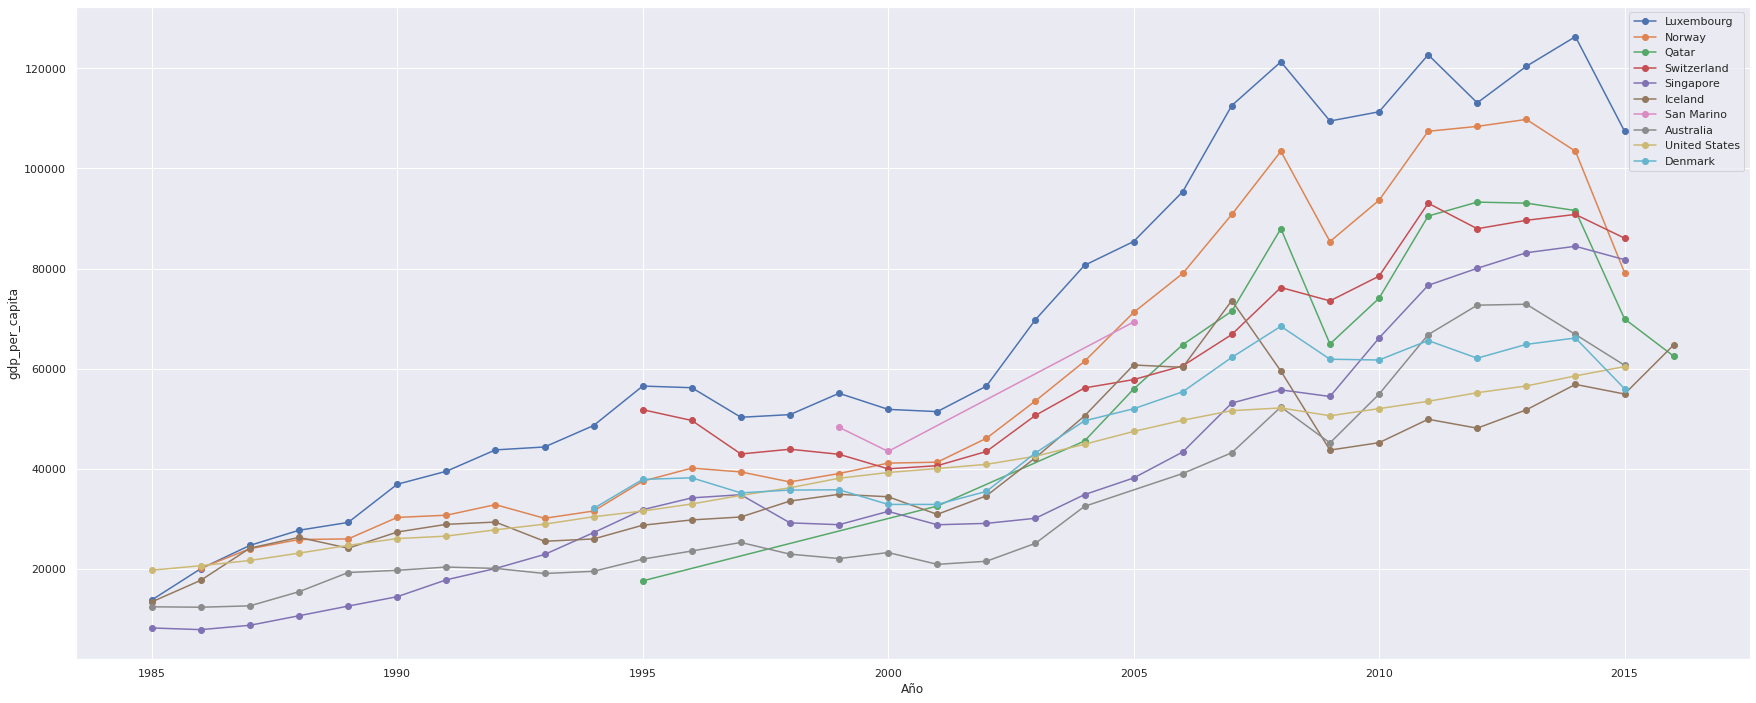

In [ ]:
plt.figure(figsize = (30,12))
df_gdp = sr.groupby(["country","year"]).gdp_per_capita.mean()
for country in list_up_gdp:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

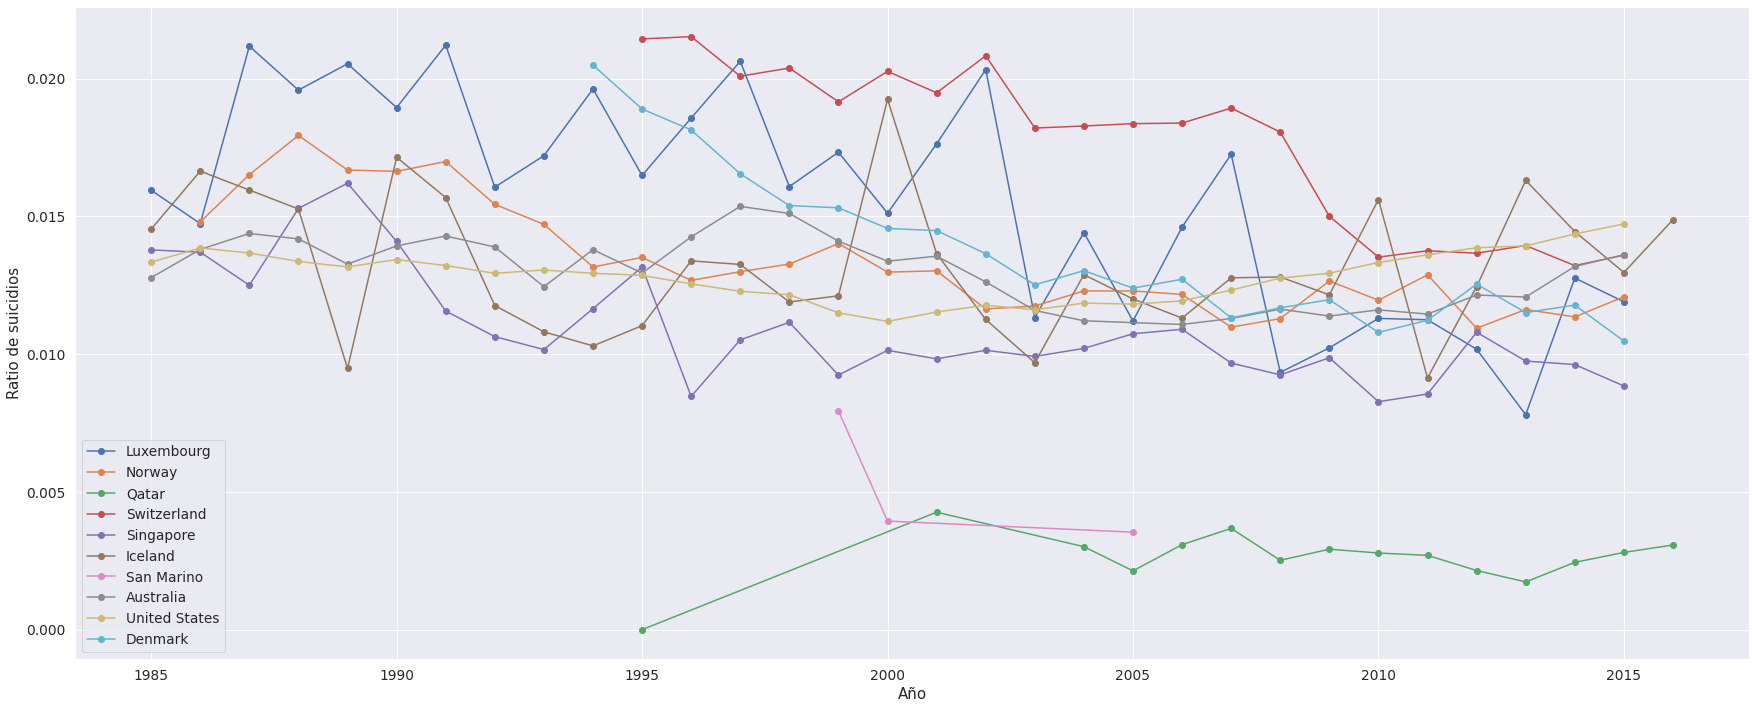

In [94]:
plt.figure(figsize = (30,12))
for country in list_up_gdp:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("Año")
plt.ylabel("Ratio de suicidios")
plt.legend()
plt.show()

Cogiendo de ejemplo a Luxemburgo, su nivel de riqueza es el más elevado de la muestra, sin embargo, el ratio de suicidios llega a ser elevado

¿Entonces existe una correlación directa entre el gdp_per_capita y el número de suicidios?

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


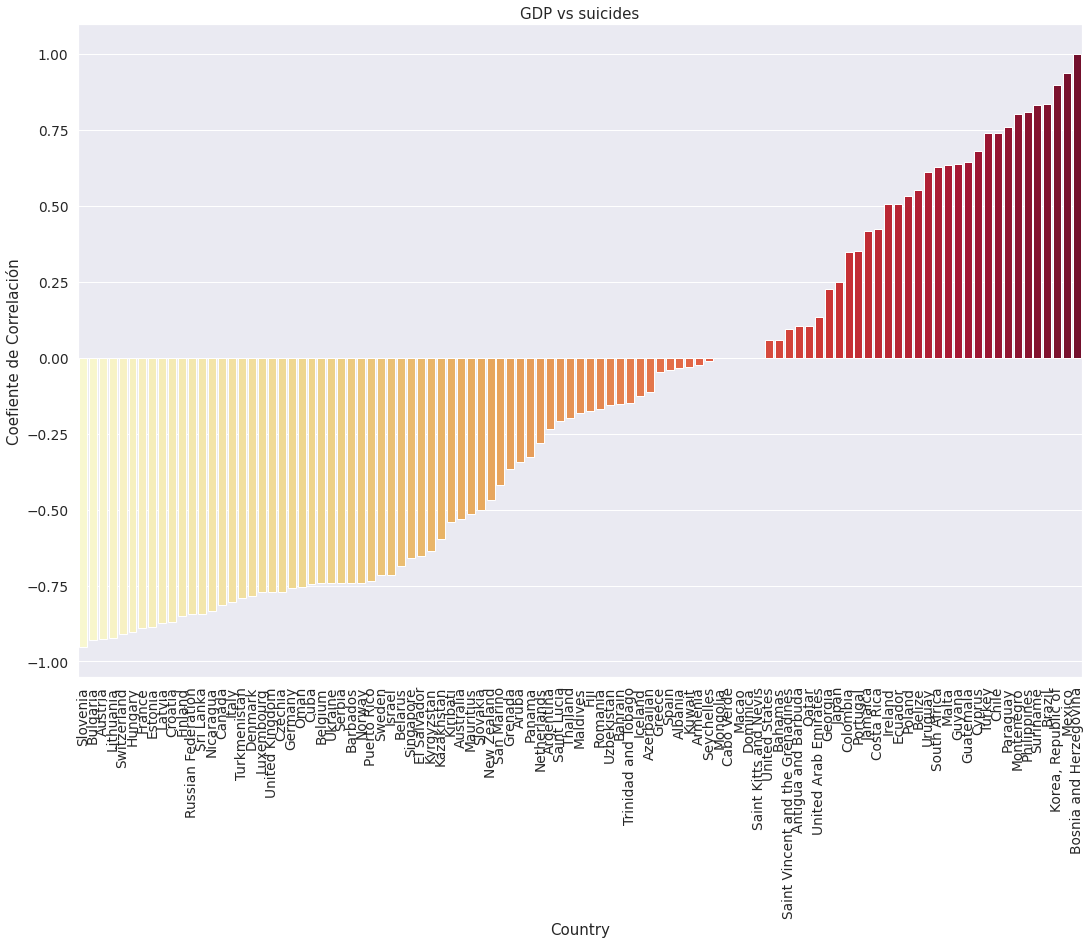

In [96]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Coefiente de Correlación")
plt.title("GDP vs suicides")
plt.show()

###Causas Geopolíticas

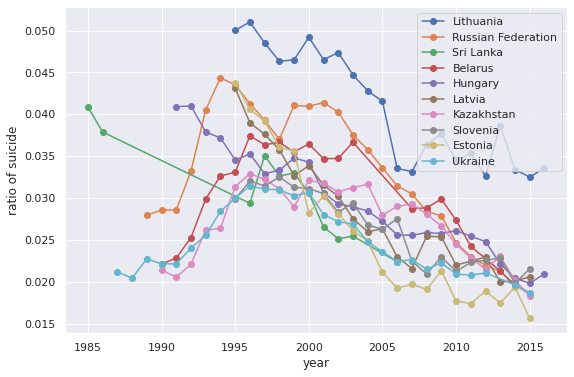

In [ ]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("ratio de suicidio")
plt.legend()
plt.show()

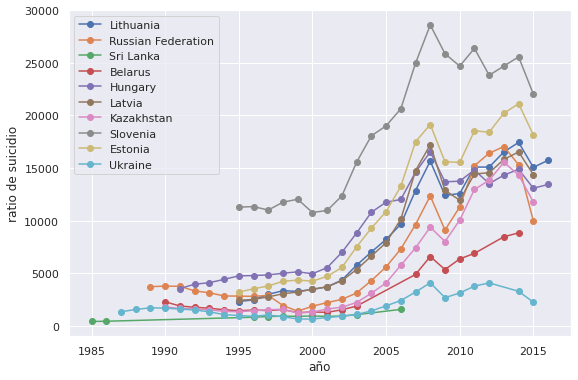

In [ ]:
plt.figure(figsize = (9,6))
df_gdp = sr.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("ratio de suicidio")
plt.legend()
plt.show()

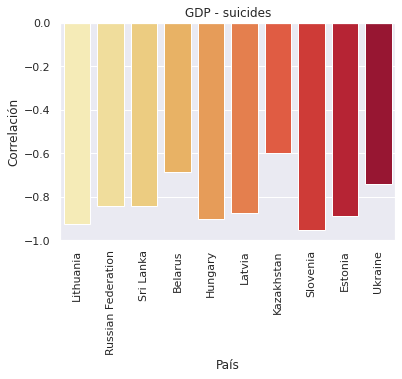

In [ ]:
corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("País")
plt.ylabel("Correlación")
plt.title("GDP - suicides")
plt.show()

¿Entonces cual es el problema de Corea del Sur? Actualmente, según la OMS el el 6º país con mayor tasa de suicidios

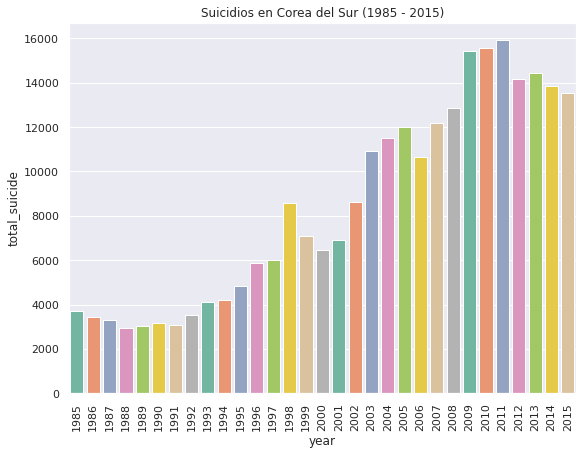

In [99]:
plt.figure(figsize=(20, 15))
countries = ['Korea, Republic of']
for i, column in enumerate(countries):
    plt.subplot(2, 2, i+1)
    data_rf = sr[sr['country'] == column]
    data_rf_grp = data_rf.groupby(by=['year']).agg({"suicides_no": ['sum']})
    data_rf_grp.columns = ['total_suicide']
    data_rf_grp.reset_index(inplace=True)
    # data_rf_grp = data_rf_grp.sort_values(by=['total_suicide'])
    data_rf_grp

    color = sns.color_palette("Set2")
    sns.set(style="darkgrid")
#     plt.figure(figsize=(15, 10))
    sns.barplot(x='year', y='total_suicide', data=data_rf_grp, palette=color)
    plt.xticks(rotation=90)
    plt.title("Suicidios en Corea del Sur (1985 - 2015)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


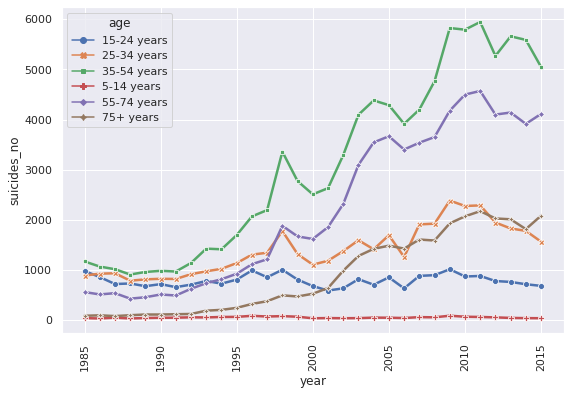

In [100]:
df_age = sr.loc[(sr['country'] == 'Korea, Republic of')& (sr['year'].between(1985, 2015))].groupby(["year","age"])["suicides_no"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

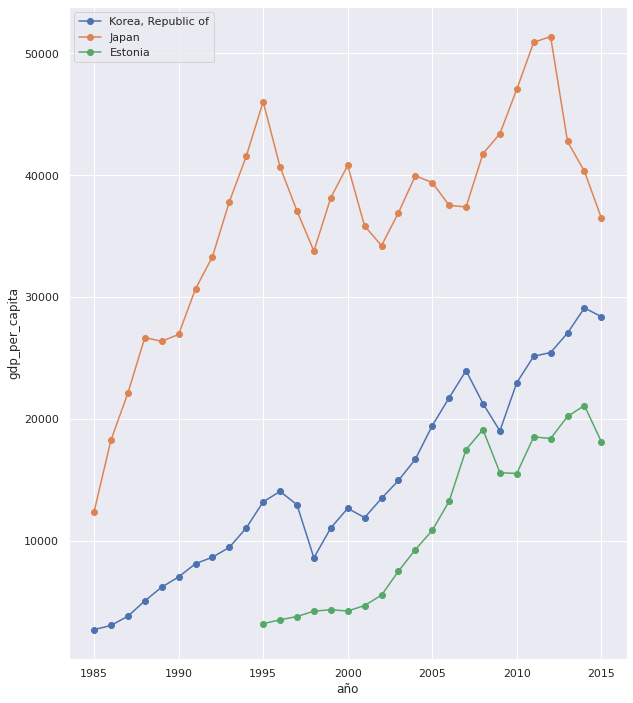

In [111]:
k_country = ['Korea, Republic of','Japan','Estonia']
plt.figure(figsize = (10,12))
df_gdp = sr.groupby(["country","year"]).gdp_per_capita.mean()
for country in k_country:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

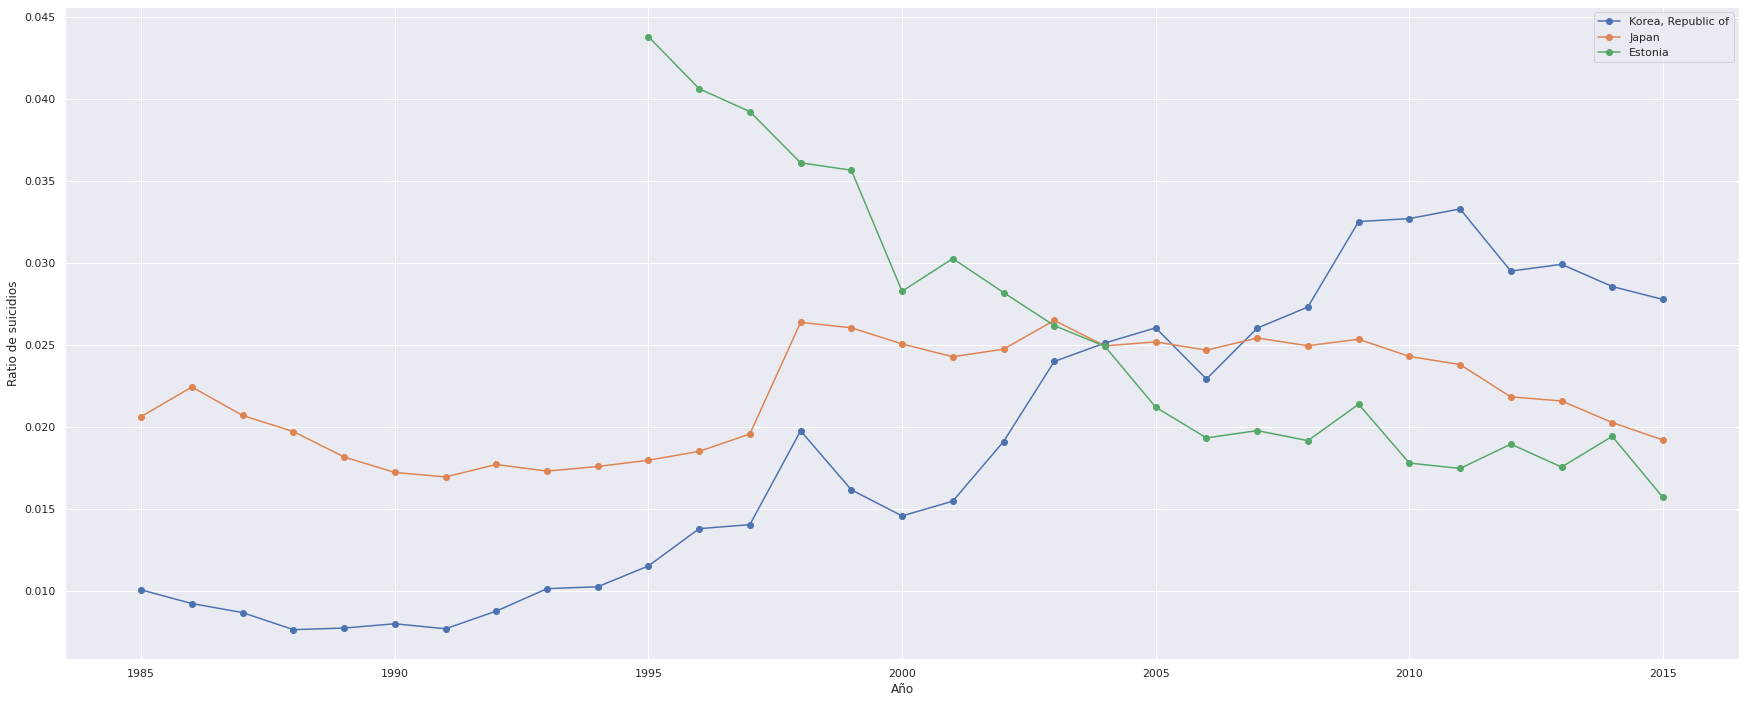

In [113]:
plt.figure(figsize = (30,12))
for country in k_country:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("Año")
plt.ylabel("Ratio de suicidios")
plt.legend()
plt.show()

¿Sólo son causas económicas?

Depresión es un tema tabú

Casos Diagnoticados de depresión en el año 2022

In [120]:
dr.loc[(dr['country']== 'South Korea')]

,country,prevalence,cases,pop2022
124,South Korea,4.1,1904645,51329.899


Tasa de desempleo

In [123]:
ur.loc[(ur['country']== 'South Korea')]

,country,pop2022
101,South Korea,51329.899


Educación

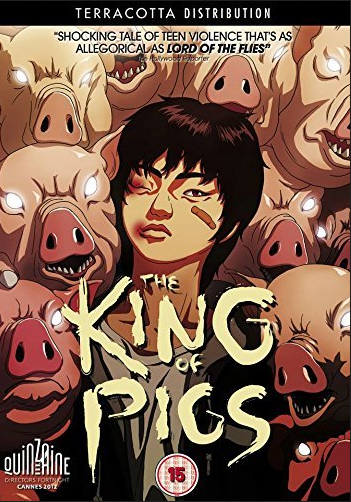

###Depresión

In [ ]:
dr.replace("Republic of Korea", "Korea, Republic of", inplace = True)
dr.replace('Czech Republic', "Czechia", inplace = True)
dr.replace('Macau', 'Macao', inplace = True)
dr.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     179 non-null    object 
 1   prevalence  179 non-null    float64
 2   cases       179 non-null    int64  
 3   pop2022     179 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ KB


In [ ]:
dr.describe()

,prevalence,cases,pop2022
count,179.000000,1.790000e+02,1.790000e+02
mean,4.440223,1.706975e+06,4.403255e+04
std,0.681251,6.131891e+06,1.556037e+05
min,2.900000,3.182000e+03,9.942600e+01
25%,4.000000,1.137420e+05,2.919170e+03
50%,4.400000,4.193020e+05,1.014057e+04
75%,5.000000,1.125315e+06,3.313527e+04
max,6.300000,5.667597e+07,1.448471e+06


In [ ]:
dr.head(10)

,country,prevalence,cases,pop2022
0,Ukraine,6.3,2800587,43192.122
1,Estonia,5.9,75667,1321.910
2,Australia,5.9,1318599,26068.792
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593
5,Portugal,5.7,578234,10140.570
6,Greece,5.7,593136,10316.637
7,Lithuania,5.6,169685,2661.708
8,Finland,5.6,293921,5554.960
9,Belarus,5.6,510764,9432.800


In [ ]:
dr.loc[dr['cases'] > dr.cases.median()].sort_values('pop2022',ascending = True).head(10)

,country,prevalence,cases,pop2022
9,Belarus,5.6,510764,9432.800
32,Hungary,5.1,493783,9606.259
33,United Arab Emirates,5.1,444016,10081.785
5,Portugal,5.7,578234,10140.570
50,Sweden,4.9,446734,10218.971
77,Azerbaijan,4.6,428873,10300.205
6,Greece,5.7,593136,10316.637
19,Czechia,5.2,525488,10736.784
69,Dominican Republic,4.7,464164,11056.370
10,Cuba,5.5,605879,11305.652


In [ ]:
dr.sort_values('cases',ascending = False)

,country,prevalence,cases,pop2022
86,India,4.5,56675969,1406631.776
117,China,4.2,54815739,1448471.400
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593
155,Indonesia,3.7,9162886,279134.505
...,...,...,...,...
22,Antigua and Barbuda,5.1,4424,99.509
127,Seychelles,4.0,3722,99.426
174,Kiribati,3.1,3452,123.419
169,Tonga,3.2,3205,107.749


In [ ]:
d_country = ['Belarus','Korea, Republic of','Switzerland','Spain','United Kingdom','Germany','Austria','Romania','Israel','Netherlands']

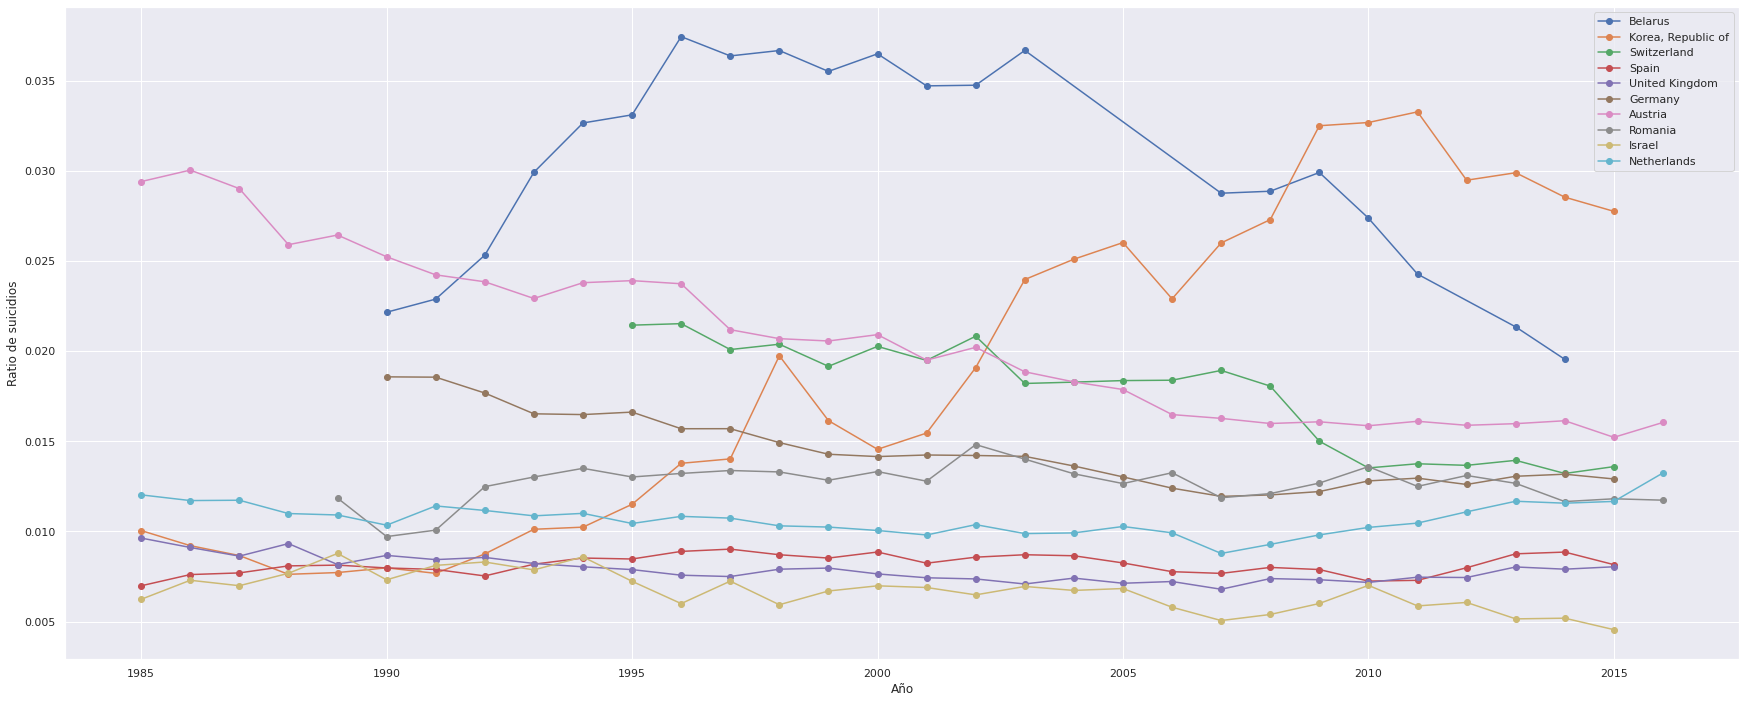

In [ ]:
plt.figure(figsize = (30,12))
for country in d_country:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("Año")
plt.ylabel("Ratio de suicidios")
plt.legend()
plt.show()

In [ ]:
ad_sc =  dr.loc[dr['cases'] > dr.cases.median()].sort_values('pop2022',ascending = True).head(10)
g_adsc = list(ad_sc['country'])


In [ ]:
low_gdp = sr.loc[(sr['gdp_per_capita'] <= sr['gdp_per_capita'].median())]

df_gb = sr.groupby(["country","year"])["suicides_no"].sum()
df_sum_l = df_gb.sort_index(ascending=True)[:] * 100

df_pop_l = sr.groupby(["country","year"]).population.sum()
df_pop_sum_l = df_pop_l.sort_index(ascending=False)[:]

ghn = df_sum_l / df_pop_sum_l
ghn.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

###Casos de depresión

In [ ]:
dr.replace("Republic of Korea", "Korea, Republic of", inplace = True)
dr.replace('Czech Republic', "Czechia", inplace = True)
dr.replace('Macau', 'Macao', inplace = True)
dr.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [ ]:
dr

,country,prevalence,cases,pop2022
0,Ukraine,6.3,2800587,43192.122
1,Estonia,5.9,75667,1321.910
2,Australia,5.9,1318599,26068.792
3,United States,5.9,17491047,334805.269
4,Brazil,5.8,11548577,215353.593
...,...,...,...,...
174,Kiribati,3.1,3452,123.419
175,Vanuatu,3.1,7917,321.832
176,Timor-Leste,3.0,33932,1369.429
177,Papua New Guinea,3.0,223094,9292.169


In [ ]:
dr.columns

In [ ]:
dr.cases.median()

In [ ]:
dr.pop2022.median()

In [ ]:
dr.pop2022.quantile(0.1)

In [ ]:
ad_sc =  dr.loc[dr['cases'] > dr.cases.median()].sort_values('pop2022',ascending = True).head(10)
g_adsc = list(ad_sc['country'])

In [ ]:
g_adsc

['Belarus',
 'Hungary',
 'United Arab Emirates',
 'Portugal',
 'Sweden',
 'Azerbaijan',
 'Greece',
 'Czechia',
 'Dominican Republic',
 'Cuba']

In [ ]:
ad_adup =  dr.loc[dr['cases'] > dr.cases.median()].sort_values('cases',ascending = False).head(20)
ag_adsc = list(ad_adup['country'])

In [ ]:
ag_adsc

['India',
 'China',
 'United States',
 'Brazil',
 'Indonesia',
 'Russia',
 'Pakistan',
 'Nigeria',
 'Bangladesh',
 'Japan']

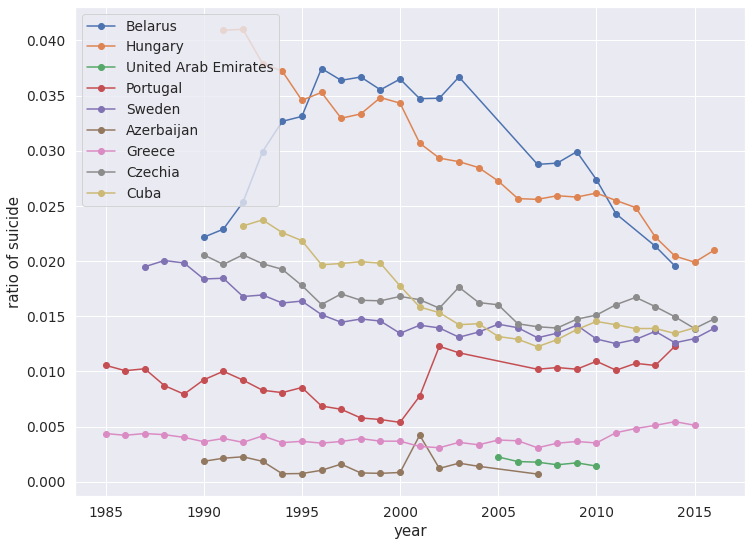

In [ ]:
plt.figure(figsize = (12,9))
for country in g_adsc:
    if country in df_total:
      plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

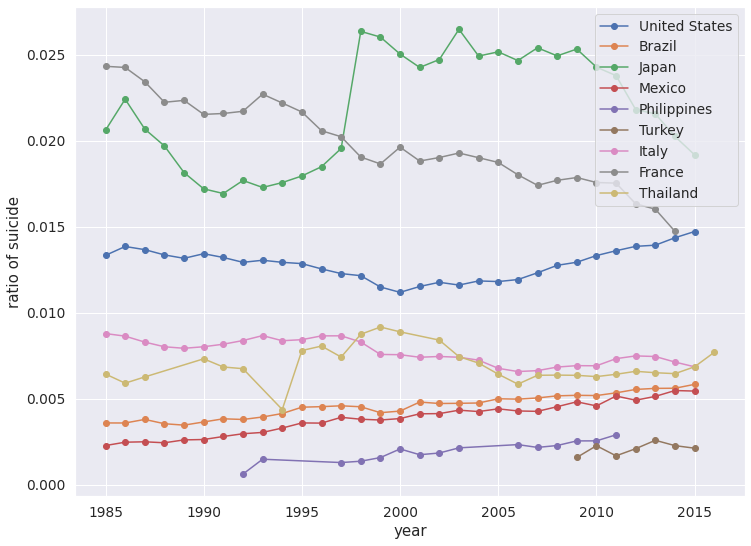

In [ ]:
plt.figure(figsize = (12,9))
for country in ag_adsc:
    if country in df_total:
      plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("año")
plt.ylabel("ratio de suicidio")
plt.legend()
plt.show()

In [ ]:
dr_china = dr.loc[dr['country'] == 'China']
(float(dr_china.cases)*100)/1414350000

3.8756841658712484